In [1]:
import pandas as pd
import numpy as np

gistemp_data = pd.read_csv('https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv').reset_index()

gistemp_data = gistemp_data.reset_index().rename(columns = \
                                                 gistemp_data.iloc[0]).iloc[1:, 1:]
def make_na(cell):
    if cell == '***':
        return np.nan
    return cell

gistemp_data = gistemp_data.applymap(lambda x: float(make_na(x)))
gistemp_data['avg'] = gistemp_data.iloc[:,1:13].apply(np.mean, axis = 1)
hiatus_data = gistemp_data.loc[(gistemp_data['Year'] >= 1998) & (gistemp_data['Year'] <= 2013), \
                 ['Year','avg']].reset_index(drop = True)

In [2]:
import statsmodels.api as sm

test_data = gistemp_data.loc[(gistemp_data['Year'] >= 1950) & (gistemp_data['Year'] <= 2013), \
                 ['Year','avg']].reset_index(drop = True)
X = test_data['Year']
y = test_data['avg']
X = sm.add_constant(X)
test_mod = sm.OLS(y, X).fit()


import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

acf_vals = sm.tsa.acf(test_mod.resid, nlags = 19)
pacf_vals = sm.tsa.pacf(test_mod.resid, nlags = 19)

plt.ylim(-0.6, 1.2)
plt.stem(list(range(len(acf_vals))), acf_vals)
plt.axhline(y=0, linestyle='-',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.ylabel('ACF')
plt.xlabel('Lag')
plt.savefig('/Users/eddieshiang/climate_boot/pic10.png', dpi= 300)
plt.show()


<Figure size 640x480 with 1 Axes>

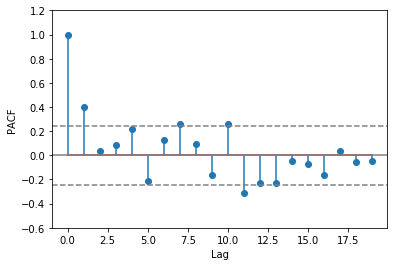

In [3]:
plt.ylim(-0.6, 1.2)
plt.stem(list(range(len(pacf_vals))), pacf_vals)
plt.axhline(y=0,linestyle='-',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.ylabel('PACF')
plt.xlabel('Lag')
plt.savefig('/Users/eddieshiang/climate_boot/pic11.png', dpi= 300)
plt.show()


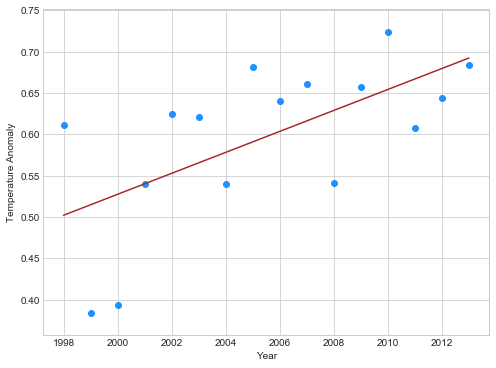

In [8]:
import statsmodels.api as sm

X = hiatus_data['Year']
y = hiatus_data['avg']
X = sm.add_constant(X)
reg_annual_const = sm.OLS(y, X).fit()


import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(8,6))
plt.scatter(X['Year'], y, color = 'dodgerblue')
plt.plot(X['Year'], reg_annual_const.predict(X), color = 'brown')
plt.xticks(np.arange(min(X['Year']), max(X['Year'])+1, 2.0))
plt.ylabel('Temperature Anomaly')
plt.xlabel('Year')
plt.savefig('/Users/eddieshiang/climate_boot/pic12.png', dpi= 300)
plt.show()


In [5]:
reg_annual_const.pvalues['Year']

0.009958699034198217

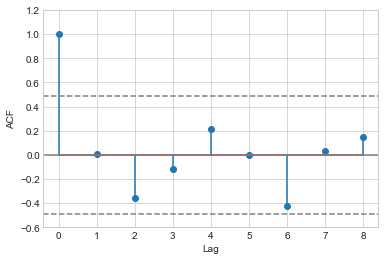

In [6]:
acf_vals = sm.tsa.acf(reg_annual_const.resid, nlags = 8)
pacf_vals = sm.tsa.pacf(reg_annual_const.resid, nlags = 8)

plt.ylim(-0.6, 1.2)
plt.stem(list(range(len(acf_vals))), acf_vals)
plt.axhline(y=0,linestyle='-',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.ylabel('ACF')
plt.xlabel('Lag')
plt.savefig('/Users/eddieshiang/climate_boot/pic13.png', dpi= 300)
plt.show()

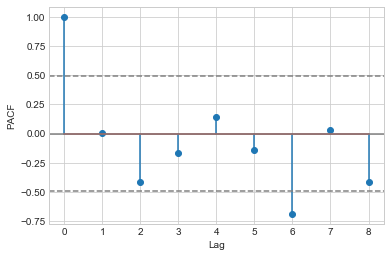

In [7]:
plt.stem(list(range(len(pacf_vals))), pacf_vals)
plt.axhline(y=0,linestyle='-',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.ylabel('PACF')
plt.xlabel('Lag')
plt.savefig('/Users/eddieshiang/climate_boot/pic14.png', dpi= 300)
plt.show()

In [9]:
hadcrut_data = pd.read_csv('/Users/eddieshiang/Downloads/HadCRUT.4.6.0.0.annual_ns_avg.txt', \
                           sep="   ", header=None)
hadcrut_data['avg'] = hadcrut_data.iloc[:,1:].apply(lambda x: x.mean(), axis = 1)

hadcrut_data = hadcrut_data.iloc[:,[0,-1]]

hadcrut_data.columns = ['Year', 'avg']
recent_df = hadcrut_data.loc[(hadcrut_data['Year'] >= 1998) & \
                               (hadcrut_data['Year'] <= 2013), \
                               ['Year','avg']]

import statsmodels.api as sm

X = recent_df['Year']
y = recent_df['avg']

X = sm.add_constant(X)

reg_annual_const = sm.OLS(y, X).fit()

reg_annual_const.predict(X)

reg_annual_const.summary()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    avg   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1.906
Date:                Tue, 17 Dec 2019   Prob (F-statistic):              0.189
Time:                        03:38:42   Log-Likelihood:                 19.601
No. Observations:                  16   AIC:                            -35.20
Df Residuals:                      14   BIC:                            -33.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.9425      8.264     -1.324      0.207     -28.667       6.782
Year           0.0057      0.004      1.380      0.189      -0.003       0.015
==============================================================================
Omnibus:                        1.004   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.900
Skew:                          -0.472   Prob(JB):                        0.638
Kurtosis:                       2.322   Cond. No.                     8.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""